## Getting libraries and data

In [16]:
import numpy as np
import pandas as pd
import requests

import matplotlib.pyplot as plt
# import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [17]:
# getting data from excel sheet

df_vol= pd.read_excel('.\datasets\Vol Basic run on 29Oct Sample.xlsx')
df_vol.head(10)

,Date_Joined,Gender,Nationality,Last 4 digits IC,Date_of_Birth,Age,Postal_Code,Race,Spoken_languages,Interests,...,Current_Employment_Status,Employer_Name,Designation,Status,Status_Remarks,Registration_Date,Membership_Type,Membership_Start_Date,Membership_Expiry_Date,Membership_Payment
0,11-01-2016,Male,NaN,NaN,05-08-1938,81.0,788214.0,Others,"Hokkien,English","Infocomm Related,",...,Retired,ForumEnergy Technologies Pte Ltd,Regional Manager,Inactive,Inactive since June 2017.,22-05-2016,NaN,NaN,NaN,NaN
1,16-05-2002,Female,NaN,0001H,30-07-1941,78.0,572152.0,Chinese,"Cantonese,Hokkien,Teochew,English,Mandarin",NaN,...,Homemaker,K K Hospital,Midwife,Inactive,Status data correction from (Ordinary Member) ...,22-05-2016,Ordinary Member,NaN,30-06-2015,NaN
2,02-02-2016,Male,NaN,0024H,17-06-1963,56.0,161057.0,Chinese,"Cantonese,Hokkien,Teochew,English,Mandarin",NaN,...,"Others, pls",NTUC Fairprice,Retail Assistant,Inactive,Status data correction from (Ordinary Member) ...,22-05-2016,Ordinary Member,NaN,30-06-2016,NaN
3,12-10-2010,Male,Singapore Permanent Resident,0037I,07-12-1935,84.0,570269.0,Chinese,"Cantonese,English,Mandarin",NaN,...,Retired,"Bank Central Asia, Indonesia",Clerk,Active,NaN,22-05-2016,Ordinary Member,25-09-2018,30-06-2019,NaN
4,12-04-2013,Female,Singapore Citizen,0066e,29-07-1952,67.0,100050.0,Chinese,",English","Office Admin.,Snr Guiding,Active Ageing Seniors",...,Retired,Singapore Post Pte Ltd,Part time CSO,Active,NaN,22-05-2016,Ordinary,05-07-2019,30-06-2019,paid
5,25-04-2014,Female,Singapore Citizen,0067I,14-07-1951,68.0,821163.0,Chinese,",English,Thai",NaN,...,Employed,Singapore Soka Association,Singing Coach,Active,NaN,22-05-2016,Ordinary,04-10-2018,30-06-2019,paid
6,26-01-1999,Female,Singapore Citizen,0068H,11-02-1946,73.0,464188.0,Chinese,Chinese,"Befriending,Events Management/Organise Activit...",...,Retired,NaN,NaN,Active,NaN,22-05-2016,Ordinary,08-01-2019,30-06-2019,paid
7,15-04-2008,Female,Singapore Citizen,0072Z,02-04-1937,82.0,310157.0,Chinese,"Cantonese,Hakka,Hokkien,Teochew,English,Mandarin",NaN,...,NaN,NaN,NaN,Active,NaN,22-05-2016,Ordinary,01-07-2018,30-06-2019,paid
8,29-08-2006,Male,Singapore Citizen,0074J,05-08-1951,68.0,670425.0,Chinese,Chinese,NaN,...,Employed,NTUC Income,P/T Insurance Agent,Active,NaN,22-05-2016,Ordinary,01-07-2020,30-06-2021,complimentary
9,04-03-2002,Male,NaN,0081G,12-05-1944,75.0,470605.0,Chinese,"Cantonese,English,Mandarin",NaN,...,NaN,NaN,NaN,Inactive,Status data correction from (Ordinary Member) ...,22-05-2016,Ordinary Member,NaN,30-06-2015,NaN


In [18]:
df_vol['Postal_Code'].isnull().value_counts()

False    4950
True     3335
Name: Postal_Code, dtype: int64

In [19]:
df_vol['Postal_Code']

0       788214.0
1       572152.0
2       161057.0
3       570269.0
4       100050.0
5       821163.0
6       464188.0
7       310157.0
8       670425.0
9       470605.0
10      460096.0
11      575444.0
12      730019.0
13      449292.0
14      578632.0
15      680453.0
16      419112.0
17      310053.0
18      579721.0
19       90013.0
20      159015.0
21           NaN
22      460415.0
23      520419.0
24      808290.0
25      570179.0
26      570292.0
27      807091.0
28      570292.0
29      570292.0
          ...   
8255         NaN
8256         NaN
8257         NaN
8258         NaN
8259         NaN
8260         NaN
8261         NaN
8262         NaN
8263         NaN
8264         NaN
8265         NaN
8266         NaN
8267         NaN
8268         NaN
8269         NaN
8270         NaN
8271         NaN
8272         NaN
8273         NaN
8274         NaN
8275         NaN
8276         NaN
8277         NaN
8278         NaN
8279         NaN
8280         NaN
8281         NaN
8282         N

## Obtaining latitude and longitude from postal code

In [20]:
# obtaining latitude and longitude details from postal code
# NOTE: this function can only be run between 9am and 5pm 
# onemap website is not functional during non-working hours

latitude =[]
longitude = []

def get_lat_long(df):

    add1 = 'https://developers.onemap.sg/commonapi/search?searchVal='
    add2 = '&returnGeom=Y&getAddrDetails=Y&pageNum=1'
    
    for i in df.index:
        print(df['Postal_Code'][i])
        searchval = df['Postal_Code'][i]
        if len(str(searchval))<4:
            latitude.append('')
            longitude.append('')
        else:
            endpoint  = str(add1+str(int(searchval))+add2)
            result = requests.get(endpoint)
            add_details = result.json()
            try:
                lat1 = add_details['results'][0]['LATITUDE']
                long1 = add_details['results'][0]['LONGITUDE']
                latitude.append(lat1)
                longitude.append(long1)
            except:
                latitude.append('')
                longitude.append('')
                
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,60)
    print(sleep_duration)
    time.sleep(sleep_duration)

                
get_lat_long(df_vol)   



788214.0
572152.0
161057.0
570269.0
100050.0
821163.0
464188.0
310157.0
670425.0
470605.0
460096.0
575444.0
730019.0
449292.0
578632.0
680453.0
419112.0
310053.0
579721.0
90013.0
159015.0
nan
460415.0
520419.0
808290.0
570179.0
570292.0
807091.0
570292.0
570292.0
440071.0
791445.0
449286.0
760935.0
528230.0
359670.0
310256.0
570292.0
789623.0
540182.0
120375.0
760880.0
270005.0
nan
650101.0
163023.0
267466.0
328825.0
521245.0
520106.0
229675.0
574907.0
140095.0
310023.0
570170.0
511212.0
440061.0
289576.0
310108.0
570292.0
140101.0
530346.0
nan
680602.0
807210.0
546536.0
138686.0
129791.0
760774.0
589629.0
579722.0
538929.0
768449.0
573973.0
570292.0
573963.0
129225.0
822210.0
650116.0
150090.0
762347.0
416383.0
570292.0
120411.0
520738.0
310196.0
534037.0
142091.0
568834.0
570212.0
671634.0
169016.0
359427.0
760791.0
120716.0
579726.0
308495.0
nan
640931.0
257717.0
570292.0
510483.0
311079.0
570212.0
683296.0
600406.0
760393.0
510509.0
570309.0
259811.0
465535.0
550401.0
439464.0
5212

556131.0
570292.0
570292.0
370027.0
nan
570219.0
570292.0
572152.0
570161.0
597594.0
530135.0
309021.0
570292.0
574327.0
649368.0
535843.0
530132.0
288092.0
100050.0
449286.0
118572.0
438808.0
160052.0
730009.0
560446.0
701020.0
276952.0
259719.0
400015.0
531174.0
388199.0
478927.0
478927.0
541316.0
518216.0
574418.0
349965.0
423974.0
588996.0
127215.0
760927.0
478927.0
457604.0
596741.0
310244.0
141090.0
730867.0
799448.0
570290.0
350146.0
680547.0
320003.0
786304.0
560507.0
487040.0
760663.0
730556.0
310236.0
209666.0
558037.0
465560.0
670408.0
548198.0
754466.0
90013.0
158748.0
271023.0
670149.0
560624.0
730703.0
570304.0
nan
461061.0
80334.0
120357.0
809954.0
266802.0
578799.0
398088.0
560650.0
680470.0
141090.0
570406.0
455006.0
578637.0
148954.0
81008.0
541277.0
50004.0
460095.0
431011.0
760224.0
520842.0
760235.0
550550.0
560172.0
550332.0
521898.0
570135.0
119707.0
541203.0
127720.0
310236.0
750415.0
449298.0
558827.0
576811.0
nan
570168.0
510555.0
560621.0
469770.0
589922.0
56

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
680461.0
nan
455509.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
310091.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
561588.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
506951.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
807308.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
272005.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
789228.0
nan
nan
nan
530251.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
440058.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
570103.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
730726.0
nan
nan
nan
nan
nan
530552.0
nan
nan
nan
nan
nan
570171.0
nan
nan
nan
nan
nan
nan
560301.0
nan
541307.0
nan
nan
nan
nan
nan
nan
nan
nan


310208.0
579165.0
80017.0
596744.0
600021.0
329506.0
650141.0
550226.0
439970.0
321101.0
417541.0
507596.0
259530.0
460805.0
560431.0
510473.0
574328.0
530533.0
570264.0
579726.0
542272.0
238621.0
733787.0
nan
590009.0
738211.0
359922.0
787740.0
310013.0
570212.0
560613.0
556114.0
521108.0
560624.0
530533.0
577949.0
787057.0
560644.0
560327.0
760880.0
530572.0
559010.0
229675.0
799287.0
458555.0
509295.0
650110.0
404002.0
550101.0
806548.0
440020.0
610113.0
428288.0
128171.0
298941.0
560520.0
570112.0
787132.0
570175.0
310174.0
530575.0
760287.0
576193.0
nan
730603.0
nan
545023.0
460059.0
548193.0
310193.0
545943.0
689093.0
329552.0
640523.0
428963.0
570262.0
nan
470117.0
439961.0
440079.0
350104.0
288058.0
730356.0
449028.0
nan
560429.0
437083.0
448908.0
601286.0
310216.0
310209.0
599795.0
823199.0
650178.0
640810.0
550228.0
120415.0
163006.0
680642.0
609781.0
478934.0
589840.0
679388.0
nan
272012.0
130012.0
80104.0
nan
510532.0
530669.0
570290.0
768429.0
760809.0
558824.0
778905.0
56

nan
309183.0
330022.0
556010.0
760617.0
320107.0
560627.0
460525.0
228576.0
259711.0
670507.0
768429.0
510551.0
310113.0
90114.0
487854.0
260005.0
760237.0
nan
329813.0
640455.0
312084.0
530709.0
417544.0
nan
460019.0
679662.0
120301.0
537899.0
120306.0
160094.0
228493.0
530135.0
267242.0
567745.0
310110.0
nan
350110.0
640186.0
570112.0
530969.0
266977.0
679668.0
589473.0
380109.0
391028.0
680752.0
468844.0
560131.0
128764.0
560306.0
310157.0
730612.0
460407.0
560467.0
679674.0
560218.0
670202.0
570245.0
310156.0
788953.0
975543.0
600113.0
579720.0
760840.0
567749.0
786798.0
570314.0
560401.0
680568.0
570110.0
486640.0
438795.0
760239.0
578103.0
549317.0
119137.0
320082.0
118051.0
nan
750357.0
539707.0
640922.0
nan
nan
312010.0
141031.0
310118.0
570183.0
456940.0
210041.0
599918.0
nan
600273.0
544119.0
541209.0
140129.0
730206.0
914029.0
798771.0
669566.0
596717.0
449300.0
588611.0
nan
270001.0
540143.0
520816.0
822210.0
128036.0
nan
153075.0
680454.0
575575.0
558556.0
575214.0
751467.

822314.0
544896.0
319772.0
310013.0
560501.0
310220.0
310100.0
nan
380043.0
548632.0
417182.0
417182.0
560729.0
679637.0
760809.0
570122.0
560423.0
650506.0
160001.0
520243.0
670650.0
600203.0
570127.0
560465.0
nan
459312.0
210039.0
309878.0
289841.0
nan
460001.0
520321.0
520126.0
98020.0
528686.0
822288.0
310175.0
730583.0
560235.0
267952.0
469977.0
nan
689674.0
560457.0
570177.0
120701.0
nan
nan
797464.0
80103.0
579858.0
310082.0
822258.0
310023.0
120351.0
nan
nan
550237.0
550412.0
768062.0
730013.0
806759.0
458966.0
650447.0
535374.0
163127.0
545369.0
348707.0
560259.0
545369.0
579480.0
542262.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
530247.0
570269.0
570269.0
759197.0
359484.0
460131.0
520256.0
600124.0
489889.0
596290.0
596290.0
821171.0
nan
522167.0
nan
545024.0
437874.0
217604.0
730418.0
429805.0
nan
768138.0
199018.0
570271.0
nan
529944.0
640411.0
467302.0
640411.0
730672.0
589320.0
321016.0
520911.0
730515.0
520911.0
310082.0
32

550467.0
574753.0
544268.0
160143.0
79118.0
759115.0
121440.0
560229.0
120455.0
138686.0
229675.0
542292.0
570158.0
651292.0
570270.0
560553.0
438905.0
322004.0
824110.0
590006.0
419591.0
320103.0
520103.0
560438.0
460043.0
640490.0
522491.0
577689.0
737939.0
311131.0
737939.0
119749.0
750308.0
50536.0
161079.0
650121.0
310217.0
260004.0
680570.0
650250.0
320114.0
510704.0
219053.0
667982.0
570309.0
268851.0
650323.0
359241.0
680471.0
359241.0
600268.0
659245.0
510724.0
540188.0
541122.0
650505.0
520871.0
596741.0
650241.0
680465.0
321026.0
574036.0
650321.0
410644.0
560215.0
460156.0
579837.0
420003.0
522487.0
576439.0
828796.0
310145.0
560356.0
310227.0
429172.0
807946.0
130023.0
737935.0
520875.0
753466.0
544988.0
579726.0
579726.0
520486.0
546286.0
543223.0
530657.0
577164.0
350134.0
387390.0
530304.0
530853.0
737935.0
239092.0
822103.0
429748.0
550241.0
530683.0
162131.0
312131.0
150103.0
120303.0
520207.0
560552.0
550501.0
550501.0
310107.0
543290.0
650113.0
543122.0
541334.0
791

670206.0
570501.0
689529.0
641673.0
600315.0
688514.0
680541.0
640520.0
822621.0
680625.0
670240.0
730855.0
760935.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


NameError: name 'random' is not defined

In [21]:
df_vol['Latitude']=pd.Series(latitude)
df_vol['Longitude']= pd.Series(longitude)

In [22]:
df_vol.to_csv('./datasets/location.csv')

## Plotting locations on map

In [23]:
import fiona 
# import geopandas as gpd

# Enable fiona driver
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

# Read file
df = gpd.read_file('./datasets/map/sla-cadastral-land-parcel-kml.kml', driver='KML')

# # Write file
# with fiona.drivers():
#     # Might throw a WARNING - CPLE_NotSupported in b'dataset sample_out.kml does not support layer creation option ENCODING'
#     df.to_file('sample_out.kml', driver='KML')
    
# Drop Z dimension of polygons that occurs often in kml 
import shapely
df.geometry = df.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y, z: (x, y), polygon))

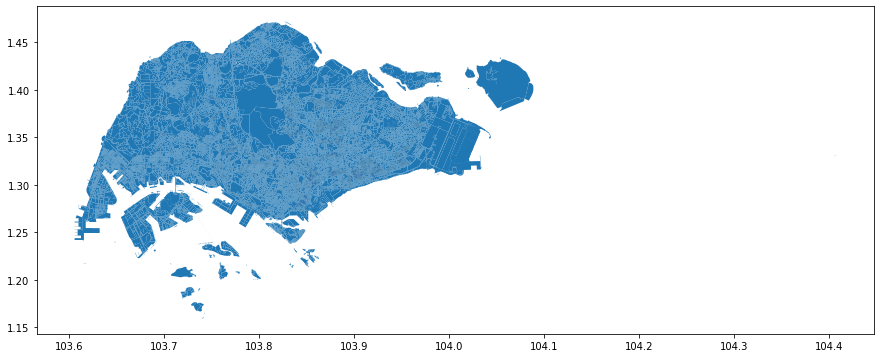

In [24]:
fig,ax = plt.subplots(figsize = (15,20))
df.plot(ax=ax)

In [25]:
df_vol = pd.read_csv('./datasets/location.csv')

In [62]:
df_vol.head()

,Unnamed: 0,Date_Joined,Gender,Nationality,Last 4 digits IC,Date_of_Birth,Age,Postal_Code,Race,Spoken_languages,...,Designation,Status,Status_Remarks,Registration_Date,Membership_Type,Membership_Start_Date,Membership_Expiry_Date,Membership_Payment,Latitude,Longitude
0,0,11-01-2016,Male,NaN,NaN,05-08-1938,81.0,788214.0,Others,"Hokkien,English",...,Regional Manager,Inactive,Inactive since June 2017.,22-05-2016,NaN,NaN,NaN,NaN,1.396587,103.822099
1,1,16-05-2002,Female,NaN,0001H,30-07-1941,78.0,572152.0,Chinese,"Cantonese,Hokkien,Teochew,English,Mandarin",...,Midwife,Inactive,Status data correction from (Ordinary Member) ...,22-05-2016,Ordinary Member,NaN,30-06-2015,NaN,1.345316,103.853985
2,2,02-02-2016,Male,NaN,0024H,17-06-1963,56.0,161057.0,Chinese,"Cantonese,Hokkien,Teochew,English,Mandarin",...,Retail Assistant,Inactive,Status data correction from (Ordinary Member) ...,22-05-2016,Ordinary Member,NaN,30-06-2016,NaN,1.290139,103.828453
3,3,12-10-2010,Male,Singapore Permanent Resident,0037I,07-12-1935,84.0,570269.0,Chinese,"Cantonese,English,Mandarin",...,Clerk,Active,NaN,22-05-2016,Ordinary Member,25-09-2018,30-06-2019,NaN,1.356889,103.842674
4,4,12-04-2013,Female,Singapore Citizen,0066e,29-07-1952,67.0,100050.0,Chinese,",English",...,Part time CSO,Active,NaN,22-05-2016,Ordinary,05-07-2019,30-06-2019,paid,1.273090,103.810144


In [78]:
df_locate = df_vol.copy()
df_locate = df_locate.loc[:,['Last 4 digits IC','Longitude', 'Latitude']]
df_locate.dropna(axis='rows', inplace=True)
df_locate.rename(columns={'Last 4 digits IC': 'vol_id'})
df_locate = df_locate.reset_index(drop=True)
df_locate.head()

,Last 4 digits IC,Longitude,Latitude
0,0001H,103.853985,1.345316
1,0024H,103.828453,1.290139
2,0037I,103.842674,1.356889
3,0066e,103.810144,1.273090
4,0067I,103.914060,1.395501


In [71]:
len(df_locate)

4679

In [73]:
crs = {'init': 'epsg:4326'}
df_locate[['Longitude', 'Latitude']].astype(float)
geometry = [Point(xy) for xy in zip(df_locate['Longitude'], df_locate['Latitude'])]
geometry[:5]

In [74]:
len(geometry)

4679

In [75]:
geo_df = gpd.GeoDataFrame(df_locate, crs=crs, geometry=geometry)
geo_df.head()

,Last 4 digits IC,Longitude,Latitude,geometry
0,0001H,103.853985,1.345316,POINT (103.853985123244 1.34531554483148)
1,0024H,103.828453,1.290139,POINT (103.828453293371 1.2901385851715)
2,0037I,103.842674,1.356889,POINT (103.842673876424 1.35688865638723)
3,0066e,103.810144,1.273090,POINT (103.810143564301 1.27309040956354)
4,0067I,103.914060,1.395501,POINT (103.914059779581 1.39550060247737)


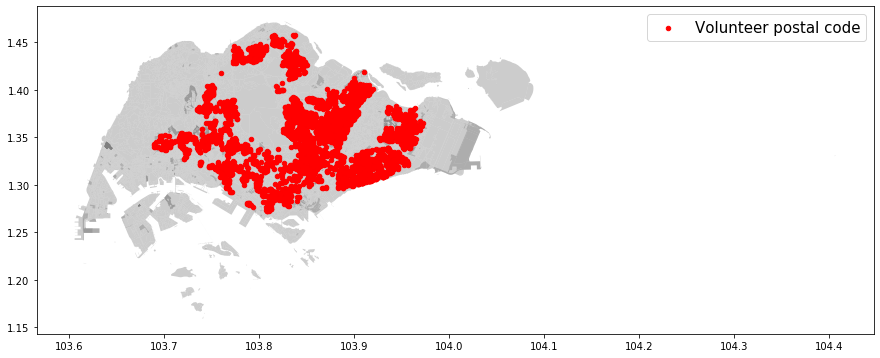

In [76]:
fig, ax = plt.subplots(figsize =(15, 20))
df.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax = ax, markersize = 20, color='red', marker = 'o', label = 'Volunteer postal code' )
plt.legend(prop = {'size':15})

- above map shows the location of 4819 volunteers